In [1]:
import numpy as np
import scipy.io as io
from matplotlib import pyplot as plt

In [2]:
f=io.wavfile.read('/home/mohan/Downloads/Audio Clip (2023-06-28 23_20_24).wav')

In [3]:
f

(44100, array([0, 0, 0, ..., 0, 0, 0], dtype=int16))

In [3]:
dat=f[1].copy()
ft=np.fft.rfft(dat)

In [4]:
df = f[0]/(len(dat))
print(df, "Hz")

0.09085739715189874 Hz


(5000.0, 10000.0)

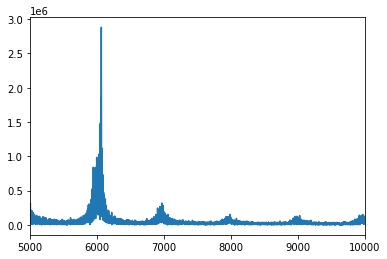

In [26]:
plt.plot(np.abs(ft))
plt.xlim(5000,10000)

In [5]:
from scipy import signal

In [6]:
peaks=signal.find_peaks(np.abs(ft)[5000:20000],distance=900)[0]
print(peaks)

[    2  1062  1967  2981  4024  4968  5958  7029  7935  8901  9984 10922
 11976 13178 14078 14989]


(0.0, 20000.0)

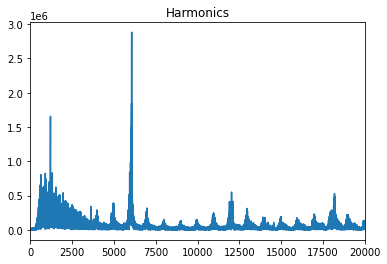

In [12]:
f=plt.gcf()
f.set_facecolor('white')
plt.plot(np.abs(ft))
plt.title("Harmonics")
# plt.plot(5000+peaks,np.abs(ft)[5000+peaks],'o',c='r')
plt.xlim(0,20000)

In [9]:
fundamental=np.mean(np.diff(peaks))*df # = vsound/2L
vsound=342
print(fundamental)
err_f = np.std(np.diff(peaks))*df
err_L = np.abs(vsound/(2*fundamental**2) * err_f)
print(f"L = {vsound/(2*fundamental): 5.2f} +/- {err_L: 5.2f} m")


90.7786540743671
L =  1.88 +/-  0.16 m


In [23]:
np.abs(ft)[5000+peaks]

array([ 317598.88170896, 2880978.85566734,  318823.02700949,
        153633.32905656,  136848.92700621,  150335.86272057,
        250306.87431605,  551415.67775465,  313307.43431551,
        186496.81794296,  192841.52604344,  175560.86350393,
        232365.9549575 ,  528383.87627276,  163298.70402754,
        138642.48576747])